# Churn Prediction Using Classification Model

In [2]:
# importing libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [3]:
df = pd.read_csv('CustomerChurn.csv') # read_data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [5]:
# display any null values
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


Change float/int data types to object for categorical variables

In [79]:
df = df.astype({'Satisfaction Score':object,'Exited':object,'IsActiveMember':object,
               'HasCrCard':object,'CustomerId':object})

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [9]:
# drop row number column
df.drop('RowNumber',axis=1,inplace=True)

In [10]:
print('Number of customers that have exited/churned:', df[df['Exited']==1]['Exited'].count())

Number of customers that have exited/churned: 2038


# Data exploration

In [11]:
# set default graph size
matplotlib.rcParams['figure.figsize'] = (8, 6)

## Demographic Information

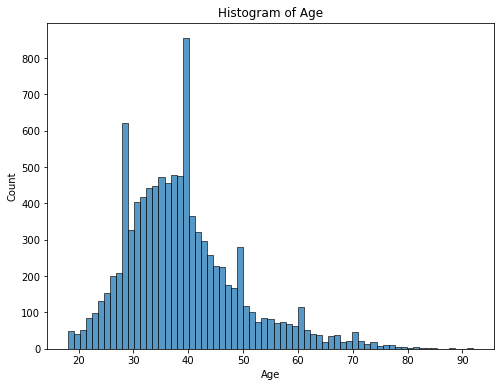

In [12]:
ax = sns.histplot(x='Age', data=df)
ax.set(title='Histogram of Age')
plt.show()

The distribution of age looks right skewed, indicating that is not normally distributed. We could probably fix this by transforming the value using `log` to follow normal distribution

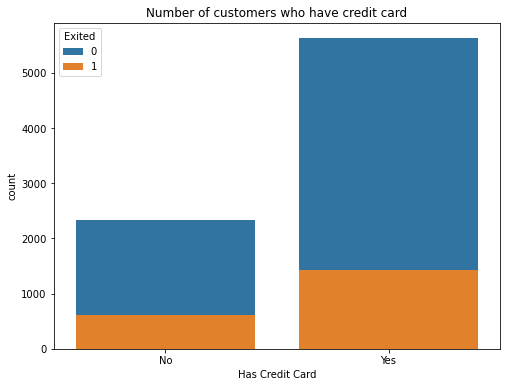

In [16]:
ax=sns.countplot(x=df['HasCrCard'], hue=df['Exited'], dodge=False)
ax.set(title='Number of customers who have credit card',xlabel='Has Credit Card',xticklabels=['No','Yes'])
plt.show()

The number of customers who have credit card are significantly lower. However, the number of customers that churn are mostly the one who have credit card.

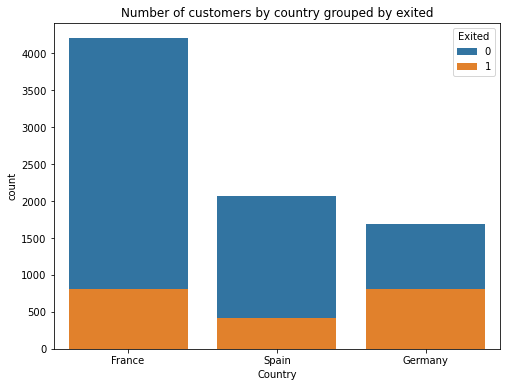

In [17]:
ax=sns.countplot(x=df['Geography'], hue=df['Exited'], dodge=False)
ax.set(title="Number of customers by country grouped by exited",xlabel='Country')
plt.show()

Most of the customers are based on France with Spain in 2nd and Germany in 3rd. It is interesting that most of the customers that churned are from Germany and the number reaches around 50% of the population.

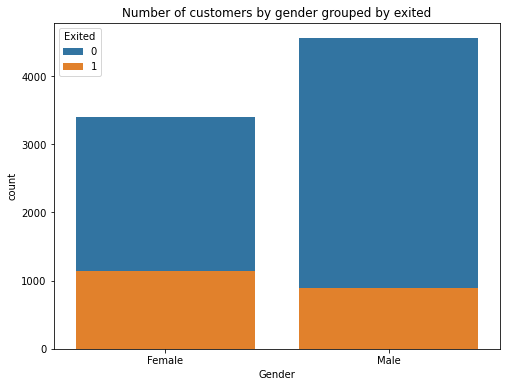

In [18]:
ax=sns.countplot(x=df['Gender'], hue=df['Exited'], dodge=False)
ax.set(title="Number of customers by gender grouped by exited")
plt.show()

From the plot it can be seen that there are more male customers than female. However, it can be seen that there are slightly more customers who churned. 

From the demographics exploration, we can say that the features `Gender`, `Geographic`, and `HasCrCard` are interesting and should be further explored.

## Customer Account Information

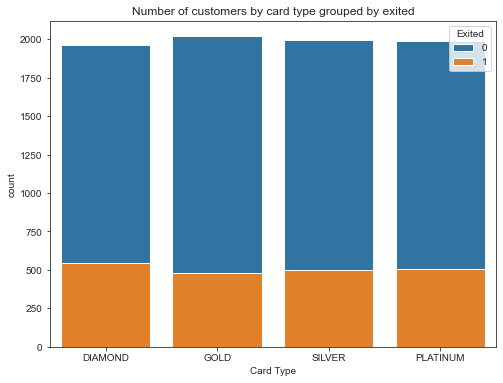

In [45]:
ax = sns.countplot(x=df['Card Type'], hue=df['Exited'], dodge=False)
ax.set(title="Number of customers by card type grouped by exited")
plt.show()

From the plot it can be seen that the number of customers that hold certain type of card are equal even after being grouped by churn status. We can consider that card type does not have influence on the churn status

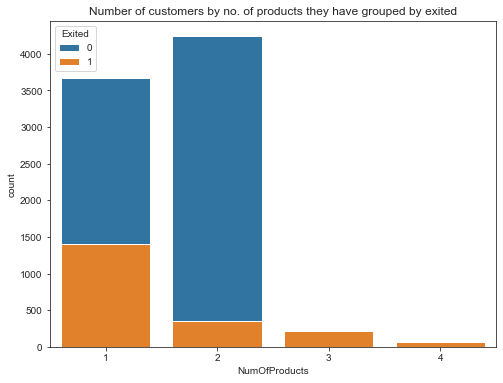

In [46]:
ax = sns.countplot(x=df['NumOfProducts'], hue=df['Exited'], dodge=False)
ax.set(title="Number of customers by no. of products they have grouped by exited")
plt.show()

Customers that churned tend to have only 1 product with the bank. There is a small percentage of the population that have 3 or 4 products with the bank and all have churned. Customers that did not churned mostly have 2 products.

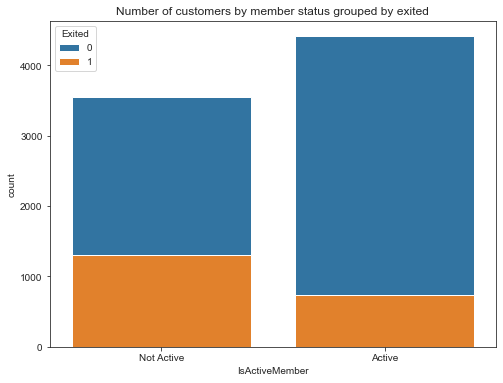

In [50]:
ax = sns.countplot(x=df['IsActiveMember'], hue=df['Exited'], dodge=False)
ax.set(title="Number of customers by member status grouped by exited", xticklabels=['Not Active', 'Active'])
plt.show()

There are slightly more active members with the bank. Churned customers tend to not have a member with the bank.

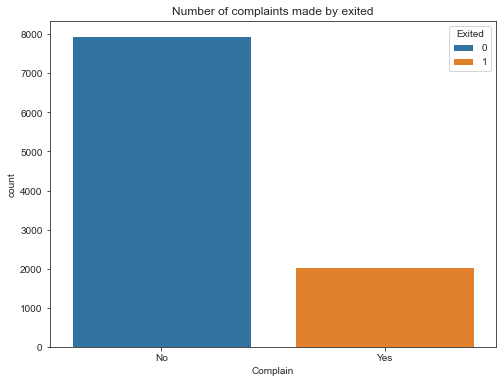

In [61]:
ax = sns.countplot(x=df['Complain'], hue=df['Exited'], dodge=False)
ax.set(title="Number of complaints made by exited", xticklabels=['No','Yes'])
plt.show()

From the plot it can be seen that almost all of the customers that have lodged a complain has churned.

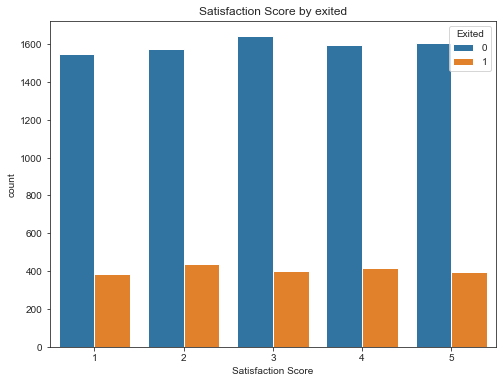

In [69]:
ax = sns.countplot(data=df,x='Satisfaction Score',hue='Exited')
ax.set(title='Satisfaction Score by exited')
plt.show()

The number of score given by customers seem to be equal among all scores from 1 to 5.

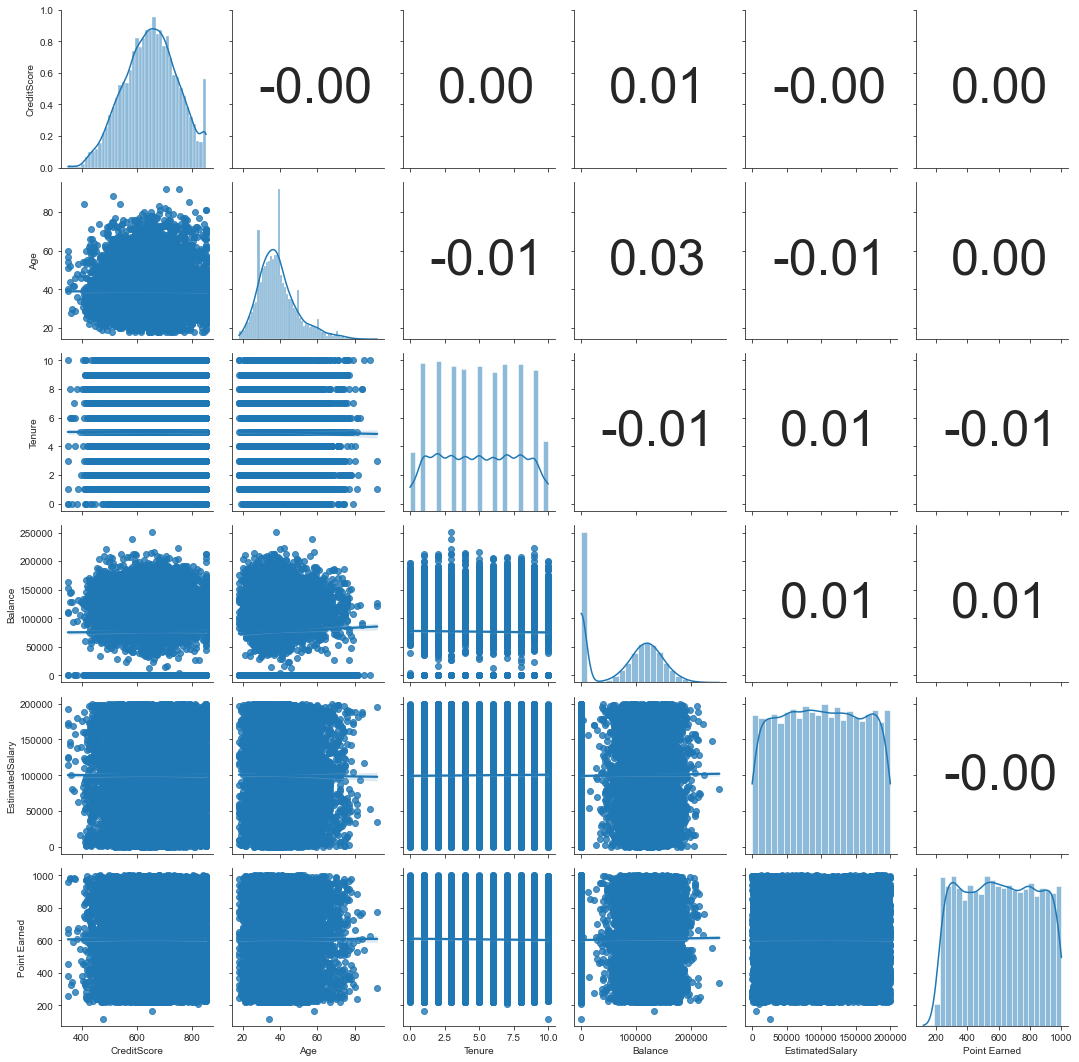

In [27]:
sns.set_style('ticks')
variables_for_pair = ['CreditScore','Age','Tenure','Balance','EstimatedSalary',
                          'Point Earned']
pairplot_df = df[variables_for_pair]

def rscore(x, y, **kws):
    r, _ = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("{:.2f}".format(r), xy = (0.55, 0.5), size=50, xycoords = ax.transAxes, va='center', ha='center')
    
pplot = sns.PairGrid(pairplot_df,diag_sharey=False)
pplot.map_lower(sns.regplot)
pplot.map_diag(sns.histplot, kde=True)
pplot.map_upper(rscore)

None of the variables `'CreditScore','Age','Tenure','Balance','EstimatedSalary','Point Earned'` are related to each other indicating there is no relationship exist in the independent variables.

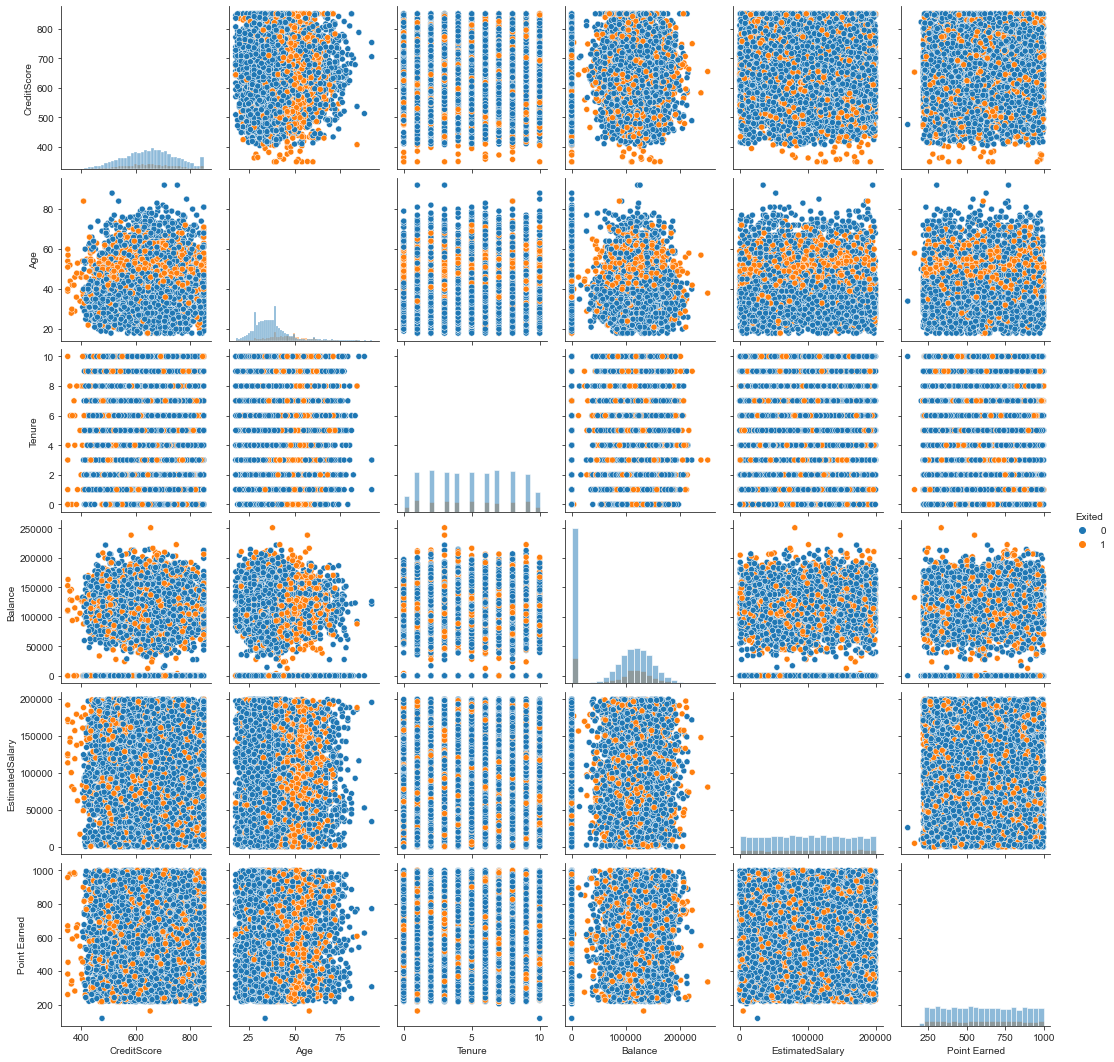

In [32]:
variables_for_pair = ['CreditScore','Age','Tenure','Balance','EstimatedSalary',
                          'Point Earned','Exited']
pairplot_df=df[variables_for_pair]
sns.pairplot(pairplot_df, hue='Exited',diag_kind='hist')

From the pairplot, it seems that the data is unbalanced i.e. there is more customers that did not churned (0) than did (1).  
We have seen the relationship/correlation between variables earlier. In the next step, we need to look at association between variables.

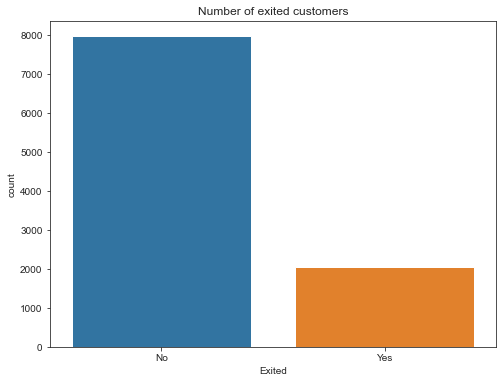

In [52]:
ax = sns.countplot(x=df["Exited"])
ax.set(title='Number of exited customers')
ax.set_xticklabels(['No','Yes'])
plt.show()

The data is indeed unbalanced with more customers that did **not** exited/churned.

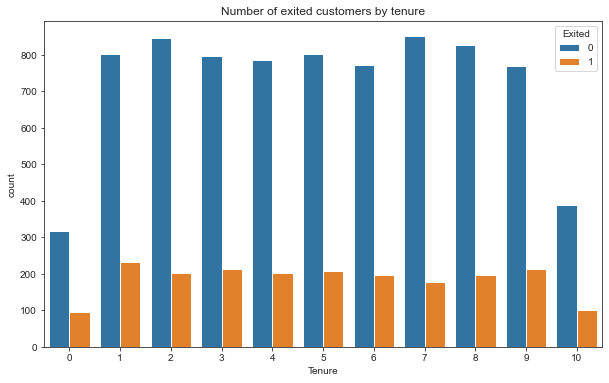

In [53]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df['Tenure'], hue=df['Exited'])
ax.set(title='Number of exited customers by tenure')
plt.show()

We could not see any significant evidence that tenure influenced churned customers. We could probably see that most customers churned after 1 year with the bank

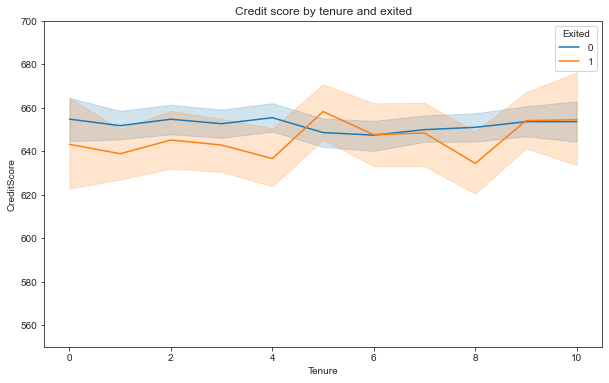

In [54]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x=df['Tenure'],y=df['CreditScore'],hue=df['Exited'])
ax.set(title='Credit score by tenure and exited')
ax.set_ylim(550,700)
plt.show()

Although the customers that did not churned tend to have slighlty higher credit score by tenure, in comparison between churn and not churn, they are in similar range. 

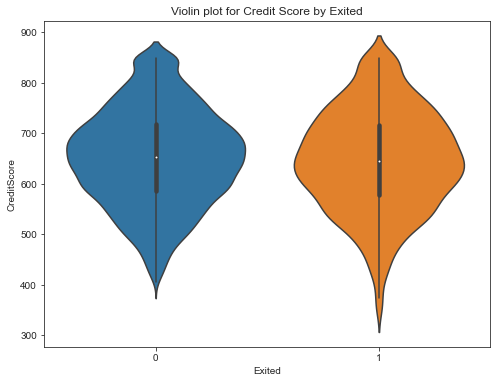

In [55]:
ax=sns.violinplot(y=df['CreditScore'], x=df['Exited'])
ax.set(title='Violin plot for Credit Score by Exited')
plt.show()

From the plot, we can see that both class have a similar distribution, customers that have exited do have slightly lower credit score distribution.

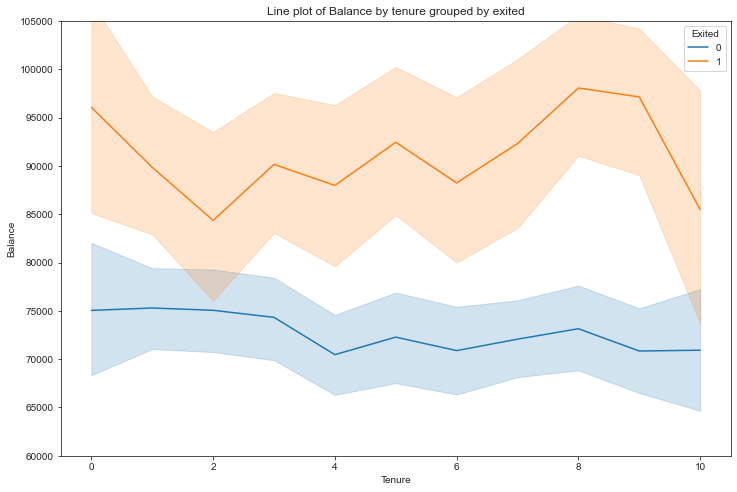

In [56]:
plt.figure(figsize=(12,8))
ax=sns.lineplot(x=df['Tenure'],y=df['Balance'],hue=df['Exited'])
ax.set(title='Line plot of Balance by tenure grouped by exited')
ax.set_ylim(60000,105000)
plt.show()

The plot indicates that balance isolates the number of customers that churned and did not churned by tenure. Customers that have higher balance tend to churn more than who have lower balance.

# Data Preparation

## One-hot encoding

The features `'Gender', 'Geographic', 'HasCrCard'` needs to be encoded as they currently contain 2 or more values.

In [80]:
def encode_concat(data, column):
    new_df = pd.get_dummies(data[column])
    df = pd.concat([data,new_df],axis=1)
    df.drop(column, axis=1,inplace=True)
    return df

prepDf = encode_concat(df,'Gender')
prepDf = encode_concat(prepDf, 'Geography')
prepDf.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Female,Male,France,Germany,Spain
0,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,1,0,1,0,0
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,1,0,0,0,1
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,1,0,1,0,0
3,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,1,0,1,0,0
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,1,0,0,0,1


In [87]:
features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Complain',
            'Satisfaction Score','Point Earned','Female','Male','France','Germany','Spain']
target = 'Exited'

In [88]:
train, test = train_test_split(prepDf, test_size=0.2,random_state=42)

In [89]:
X_train = train[features]
y_train = train[target].astype(str)
X_test = test[features]
y_test = test[target].astype(str)

In [90]:
Logreg = LogisticRegression()
Logreg.fit(X_train, y_train)

LogisticRegression()

In [91]:
y_hat = Logreg.predict(X_test)

In [92]:
accuracy_score(y_hat, y_test)

0.799

In [93]:
from sklearn.feature_selection import RFE

In [94]:
estimator = RFE(Logreg,n_features_to_select=1)
fit = estimator.fit(X_train,y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\Brian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Brian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Num Features: 1
Selected Features: [False False False False False False False False  True False False False
 False False False False]
Feature Ranking: [13  8 11 15  4 12  2 16  1 10 14  3  5  7  9  6]


In [28]:
X_train = train[['Age']]
y_train = train[target].astype(str)
X_test = test[['Age']]
y_test = test[target].astype(str)

In [29]:
Logreg2 = LogisticRegression()
Logreg2.fit(X_train,y_train)

/private/var/containers/Bundle/Application/6A062D4B-BEF5-4DC8-90D9-EC0A94C48164/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [30]:
y_hat = Logreg2.predict(X_test)

In [31]:
accuracy_score(y_hat,y_test)

0.784

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
features = variables_for_pair[:len(variables_for_pair)-1]
target = ['Exited']

In [34]:
X_train = train[features]
y_train = train[target].astype(str)
X_test = test[features]
y_test = test[target].astype(str)

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

/private/var/containers/Bundle/Application/6A062D4B-BEF5-4DC8-90D9-EC0A94C48164/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [36]:
y_hat=knn.predict(X_test)

In [37]:
accuracy_score(y_hat, y_test)

0.765

In [38]:
print(classification_report(y_hat, y_test, target_names=['No','Yes']))

              precision    recall  f1-score   support

          No       0.93      0.81      0.86      1851
         Yes       0.09      0.24      0.13       149

    accuracy                           0.77      2000
   macro avg       0.51      0.52      0.50      2000
weighted avg       0.87      0.77      0.81      2000



In [39]:
print(confusion_matrix(y_hat,y_test))

[[1494  357]
 [ 113   36]]


In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [42]:
y_hat=clf.predict(X_test)

In [43]:
accuracy_score(y_hat,y_test)

0.72

In [44]:
cross_val_score(clf, X_train, y_train, cv=10)

array([0.74   , 0.7225 , 0.7275 , 0.7475 , 0.72625, 0.72875, 0.71375,
       0.7125 , 0.72375, 0.7125 ])

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train,y_train)


/private/var/containers/Bundle/Application/6A062D4B-BEF5-4DC8-90D9-EC0A94C48164/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [55]:
y_hat = clf.predict(X_test)

In [56]:
accuracy_score(y_hat,y_test)

0.8105

In [57]:
print(classification_report(y_hat,y_test, target_names=['no','yes']))

              precision    recall  f1-score   support

          no       0.99      0.81      0.89      1950
         yes       0.08      0.64      0.14        50

    accuracy                           0.81      2000
   macro avg       0.54      0.73      0.52      2000
weighted avg       0.97      0.81      0.87      2000



In [50]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(X_train,y_train)

/private/var/mobile/Containers/Data/Application/D44CDF96-5B57-4961-92CB-18137496DCD2/tmp/ipykernel_5226/2362832313.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


RandomForestClassifier(max_depth=2, random_state=42)

In [51]:
y_hat = clf.predict(X_test)

In [52]:
accuracy_score(y_hat, y_test)

0.8055

In [53]:
print(classification_report(y_hat,y_test, target_names=['no','yes']))

              precision    recall  f1-score   support

          no       1.00      0.81      0.89      1996
         yes       0.01      1.00      0.02         4

    accuracy                           0.81      2000
   macro avg       0.51      0.90      0.46      2000
weighted avg       1.00      0.81      0.89      2000



## Equal sampling of each class

In [64]:
dfSt = df.groupby("Exited").sample(n=1500, random_state=42)
dfSt.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
2175,15769254,Tuan,757,Germany,Female,34,9,101861.36,2,0,0,187011.96,0,0,5,PLATINUM,903
1979,15635597,Echezonachukwu,644,France,Male,33,8,0.00,2,1,1,155294.17,0,0,5,SILVER,813
1932,15586993,Giordano,655,Spain,Female,56,5,0.00,2,1,1,41782.70,0,0,2,PLATINUM,979
1518,15634375,Duncan,710,Spain,Female,36,8,0.00,2,0,0,83206.19,0,0,3,SILVER,636
4455,15782531,Chou,684,Spain,Female,31,8,0.00,2,1,0,188637.05,0,0,4,SILVER,515


In [65]:
train, test = train_test_split(dfSt, test_size=0.2, random_state=42)

In [66]:
X_train = train[features]
y_train = train[target].astype(str)
X_test = test[features]
y_test = test[target].astype(str)

In [67]:
model = LogisticRegression()
model.fit(X_train, y_train)

/private/var/containers/Bundle/Application/6A062D4B-BEF5-4DC8-90D9-EC0A94C48164/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [68]:
y_hat = model.predict(X_test)

In [69]:
accuracy_score(y_hat,y_test)

0.6616666666666666

In [71]:
print(classification_report(y_hat,y_test,target_names=['no','yes']))

              precision    recall  f1-score   support

          no       0.66      0.68      0.67       306
         yes       0.66      0.64      0.65       294

    accuracy                           0.66       600
   macro avg       0.66      0.66      0.66       600
weighted avg       0.66      0.66      0.66       600



In [79]:
knnModel = KNeighborsClassifier(n_neighbors=5)
knnModel.fit(X_train,y_train)

/private/var/containers/Bundle/Application/6A062D4B-BEF5-4DC8-90D9-EC0A94C48164/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [80]:
y_hat = knnModel.predict(X_test)

In [81]:
accuracy_score(y_hat,y_test)

0.53

In [82]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train,y_train)

/private/var/containers/Bundle/Application/6A062D4B-BEF5-4DC8-90D9-EC0A94C48164/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [83]:
y_hat = clf.predict(X_test)

In [84]:
accuracy_score(y_hat, y_test)

0.6983333333333334

In [86]:
print(classification_report(y_hat, y_test, target_names=['no','yes']))

              precision    recall  f1-score   support

          no       0.76      0.69      0.72       344
         yes       0.63      0.71      0.67       256

    accuracy                           0.70       600
   macro avg       0.70      0.70      0.70       600
weighted avg       0.71      0.70      0.70       600



In [73]:
estimator = RFE(model)
fit = estimator.fit(X_train,y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True  True  True False False False]
Feature Ranking: [1 1 1 3 4 2]


/private/var/containers/Bundle/Application/6A062D4B-BEF5-4DC8-90D9-EC0A94C48164/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/private/var/containers/Bundle/Application/6A062D4B-BEF5-4DC8-90D9-EC0A94C48164/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/private/var/containers/Bundle/Application/6A062D4B-BEF5-4DC8-90D9-EC0A94C48164/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp